### 1- Start the Environment

In [1]:
!pip -q install ./python

In [2]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment

In [3]:

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2- State and Action Info

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3- Take Random Actions

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0  
j=0
# initialize the score
while True:
#for j in range(200):
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    j += 1
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score), 'j= ', j)

Score: 0.0 j=  300


### 4- Train the DQN

In [7]:
#from dqn_agent import Agent

#agent = Agent(state_size=37, action_size=4, seed=0, mode = 'Vanilla')

In [8]:

def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.001, eps_decay=0.992):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    mean_scores = []
    first_success = []
    solved = False
    max_score = 0
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0] 
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        mean_scores.append(np.mean(scores_window))
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>= 13.0:
            if not solved:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                solved = True
                first_success = i_episode
            if score > max_score:
                max_score = score
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            
            #break

    return mean_scores, first_success



In [9]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0, mode = 'Vanilla')

scores_v, success_v = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_v)), scores_v)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 1.32
Episode 200	Average Score: 6.89
Episode 300	Average Score: 10.16
Episode 400	Average Score: 12.65
Episode 424	Average Score: 13.03
Environment solved in 324 episodes!	Average Score: 13.03
Episode 500	Average Score: 15.23
Episode 600	Average Score: 14.81
Episode 700	Average Score: 15.94
Episode 800	Average Score: 15.95
Episode 900	Average Score: 16.49
Episode 1000	Average Score: 15.43
424


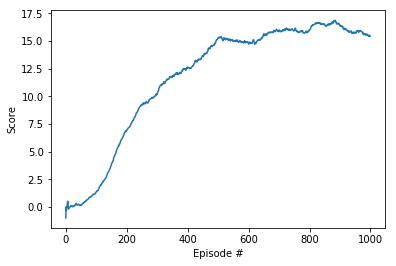

Episode 100	Average Score: 1.42
Episode 200	Average Score: 6.82
Episode 300	Average Score: 10.66
Episode 367	Average Score: 13.07
Environment solved in 267 episodes!	Average Score: 13.07
Episode 400	Average Score: 13.64
Episode 500	Average Score: 16.09
Episode 600	Average Score: 15.67
Episode 700	Average Score: 15.79
Episode 800	Average Score: 15.50
Episode 900	Average Score: 16.28
Episode 1000	Average Score: 17.36


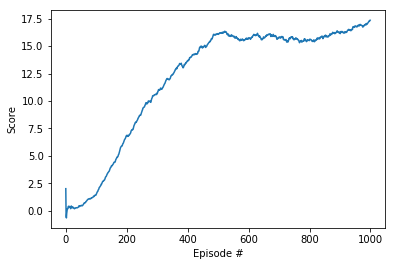

In [11]:
agent = Agent(state_size=37, action_size=4, seed=0, mode = 'Double')
scores_d, success_d = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_d)), scores_d)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.70
Episode 200	Average Score: 5.29
Episode 300	Average Score: 8.81
Episode 400	Average Score: 12.41
Episode 419	Average Score: 13.07
Environment solved in 319 episodes!	Average Score: 13.07
Episode 500	Average Score: 14.98
Episode 600	Average Score: 16.14
Episode 700	Average Score: 16.67
Episode 800	Average Score: 16.82
Episode 900	Average Score: 16.96
Episode 1000	Average Score: 17.67


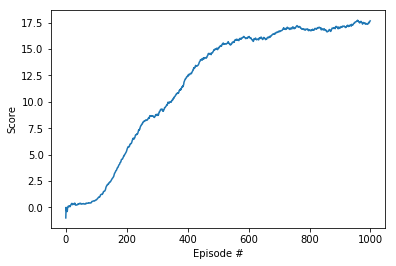

In [12]:
agent = Agent(state_size=37, action_size=4, seed=0, mode = 'Dueling')
scores_duel, success_duel = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_duel)), scores_duel)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 0.75
Episode 200	Average Score: 6.64
Episode 300	Average Score: 10.43
Episode 400	Average Score: 12.56
Episode 418	Average Score: 13.00
Environment solved in 318 episodes!	Average Score: 13.00
Episode 500	Average Score: 14.86
Episode 600	Average Score: 15.33
Episode 700	Average Score: 16.09
Episode 800	Average Score: 16.11
Episode 900	Average Score: 16.02
Episode 1000	Average Score: 15.87


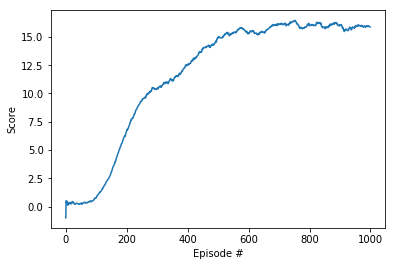

In [13]:
agent = Agent(state_size=37, action_size=4, seed=0, mode = 'Double Dueling')
scores_dd, success_dd = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_dd)), scores_dd)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

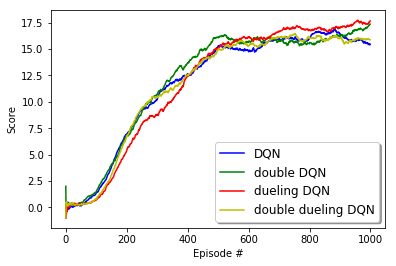

In [14]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_v)), scores_v, color ='b',  label='DQN')
plt.plot(np.arange(len(scores_d)), scores_d, color ='g',  label='double DQN')
plt.plot(np.arange(len(scores_duel)), scores_duel, color ='r',  label='dueling DQN')
plt.plot(np.arange(len(scores_dd)), scores_dd, color ='y',  label='double dueling DQN')
legend = ax.legend(shadow=True, fontsize='large')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

fig.savefig('outputs.png')